In [6]:
#A. Use the iris database to answer the following quesitons:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

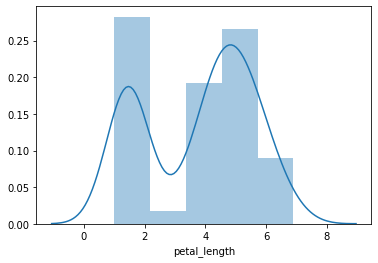

In [8]:
#1. What does the distribution of petal lengths look like?
sns.distplot(iris.petal_length)

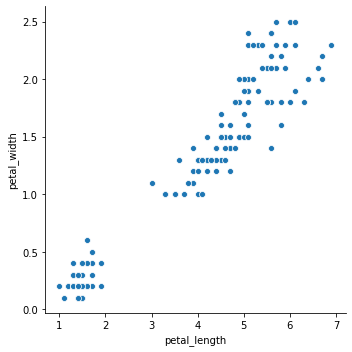

In [40]:
#2. Is there a correlation between petal length and petal width?
sns.relplot(data=iris, x="petal_length", y='petal_width')

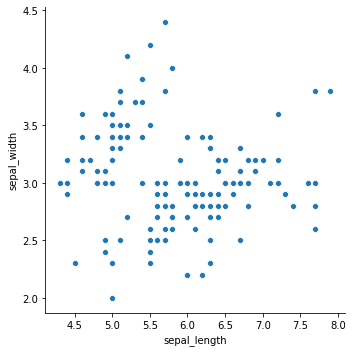

In [41]:
#3. Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, x='sepal_length', y='sepal_width')

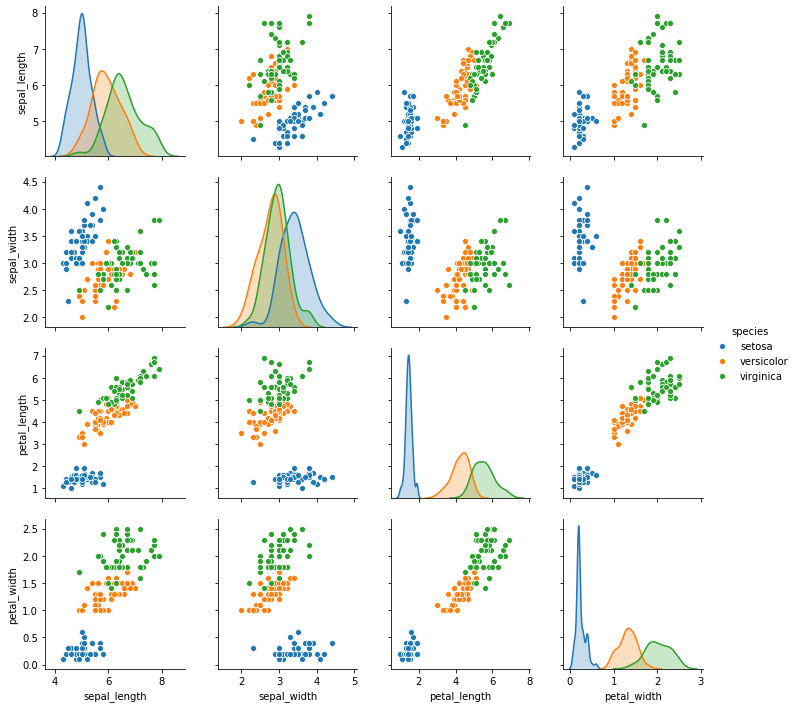

In [90]:
#4. Which features would be best used to predict species?
# petal length and width would be better to predict species
sns.pairplot(iris, hue='species')

In [63]:
#B1.Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

anscombe = sns.load_dataset('anscombe')
anscombe.describe()
grouped = anscombe.groupby('dataset').agg(['min','max','mean','median']).T
grouped

dataset           I         II    III         IV
x min      4.000000   4.000000   4.00   8.000000
  max     14.000000  14.000000  14.00  19.000000
  mean     9.000000   9.000000   9.00   9.000000
  median   9.000000   9.000000   9.00   8.000000
y min      4.260000   3.100000   5.39   5.250000
  max     10.840000   9.260000  12.74  12.500000
  mean     7.500909   7.500909   7.50   7.500909
  median   7.580000   8.140000   7.11   7.040000

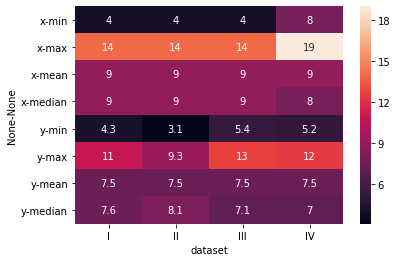

In [52]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.heatmap(data=grouped, annot=True)

In [137]:
#2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
from pydataset import data
InsectSprays = data('InsectSprays')
#data('InsectSprays', show_doc=True) #show documentation
InsectSprays
#sns.boxplot(data=InsectSprays, y='count', x='spray')

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


In [142]:
#3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
swiss = data('swiss')
swiss
#A. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic.apply([lambda x: True if x >= 50 else False])
swiss.head(10)


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


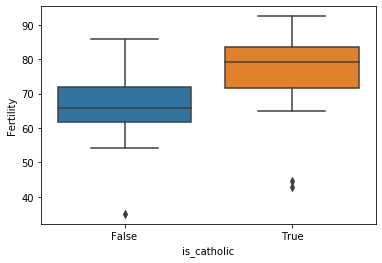

In [118]:
##B. Does whether or not a province is Catholic influence fertility?
'''is_catholic==True, province, Fertility, group by '''
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')

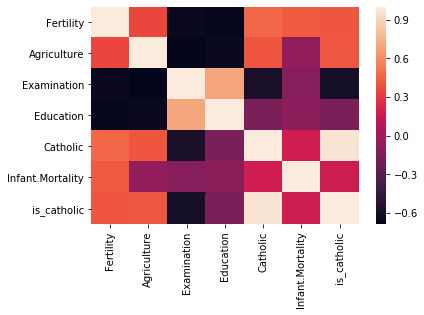

In [141]:
#C. What measure correlates most strongly with fertility?
swiss.corr()
sns.heatmap(swiss.corr())

In [229]:
#4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
from env import host, user, password

def get_db_url(host, user, password, database_name):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url

database_name = "chipotle"
url = get_db_url(host, user, password, database_name)
query = """SELECT * FROM orders"""
chipotle = pd.read_sql(query, url)

#cleaning up the column 'item_price'
item_price = chipotle['item_price']
n_item_price = item_price.str.replace('$', '').str.replace('.','')
n_item_price

new_price = n_item_price.astype(float)
new_price


0        239.0
1        339.0
2        339.0
3        239.0
4       1698.0
5       1098.0
6        169.0
7       1175.0
8        925.0
9        925.0
10       445.0
11       875.0
12       875.0
13      1125.0
14       445.0
15       239.0
16       849.0
17       849.0
18       218.0
19       875.0
20       445.0
21       899.0
22       339.0
23      1098.0
24       339.0
25       239.0
26       849.0
27       899.0
28       109.0
29       849.0
30       239.0
31       899.0
32       169.0
33       899.0
34       109.0
35       875.0
36       875.0
37       445.0
38       295.0
39      1175.0
40       215.0
41       445.0
42      1125.0
43      1175.0
44       875.0
45      1098.0
46       899.0
47       339.0
48       899.0
49       399.0
50       899.0
51       218.0
52      1098.0
53       109.0
54       899.0
55       239.0
56       925.0
57      1125.0
58      1175.0
59       215.0
60       445.0
61       925.0
62      1125.0
63       875.0
64       899.0
65       899.0
66       3

In [227]:
# update df with updates columns
count = chipotle.groupby('item_name').agg({'quantity': 'count', 'item_price' : 'sum'}).sort_values(by='quantity', ascending=False).head(4)
count
new_count = count.reset_index()
new_count


,item_name,quantity,item_price
0,Chicken Bowl,726,$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $11.25 $...
1,Chicken Burrito,553,$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $10.98 $8.75 $8.75 $8.75 $8.75 $8.49 $8.4...
2,Chips and Guacamole,479,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.99 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $4...
3,Steak Burrito,368,$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $8.99 $9.25 ...


In [149]:
#5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.
sleepstudy = data('sleepstudy')
#data('sleepstudy', show_doc=True)
sleepstudy
#sns.lineplot()
#reset index

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308
